In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

# Code for data extraction
1. In this section we will load the raw data and extract utilization and frequency value

In [4]:
utilData = pd.read_csv('./Util_Run1.csv')
utilData.shape

(2674, 6)

In [5]:
utilData.head()

,memUse,memTot,memfreq,cpuid,cpuload,cpufreq
0,604872,4612865,165000000,0,31,600000
1,675,28712,275000000,0,4,200000
2,1191888,12624777,413000000,0,8,200000
3,773492,8196989,275000000,0,9,300000
4,1144,57890,206000000,0,7,300000


In [94]:
utilData['memLoad'] = utilData['memUse']*100/utilData['memTot']
utilData['memScore'] = utilData['memLoad']*utilData['memfreq']/825000000
utilData['memF'] = utilData['memfreq']*100/825000000

In [95]:
utilData['cpuScore'] = utilData['cpuload']*utilData['cpufreq']/1400000
utilData['cpuF'] = utilData['cpufreq']*100/1000000

In [96]:
utilData.head()

,memUse,memTot,memfreq,cpuid,cpuload,cpufreq,memLoad,memScore,memF,cpuScore,cpuF
0,604872,4612865,165000000,0,31,600000,13.112718,2.622544,20.000000,13.285714,60.0
1,675,28712,275000000,0,4,200000,2.350933,0.783644,33.333333,0.571429,20.0
2,1191888,12624777,413000000,0,8,200000,9.440864,4.726154,50.060606,1.142857,20.0
3,773492,8196989,275000000,0,9,300000,9.436294,3.145431,33.333333,1.928571,30.0
4,1144,57890,206000000,0,7,300000,1.976162,0.493442,24.969697,1.500000,30.0


In [97]:
tot_train = utilData.iloc[0:2136]


In [98]:
train_1 = utilData.iloc[0:534]
train_2 = utilData.iloc[534:1068]
train_3 = utilData.iloc[1068:1602]
train_4 = utilData.iloc[1602:2136]
test_data = utilData.iloc[2136:]
print(train_1.tail())
test_data.shape

      memUse   memTot    memfreq  cpuid  cpuload  cpufreq    memLoad  \
529    41341   464426  825000000      0       50   800000   8.901526   
530    41341   464426  825000000      0       33   600000   8.901526   
531    41341   464426  825000000      0       30   600000   8.901526   
532    41341   464426  825000000      0       29   500000   8.901526   
533  2457799  3939455  825000000      0       40   700000  62.389315   

      memScore   memF   cpuScore  cpuF  
529   8.901526  100.0  28.571429  80.0  
530   8.901526  100.0  14.142857  60.0  
531   8.901526  100.0  12.857143  60.0  
532   8.901526  100.0  10.357143  50.0  
533  62.389315  100.0  20.000000  70.0  


(538, 11)

# Modeling 
In this section we will model the data and test its accuracy

In [104]:
model = ARIMA(tot_train['cpuScore'], order=(4,0,0), exog=tot_train[['cpuF']])
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:               cpuScore   No. Observations:                 2136
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -6618.186
Date:                Mon, 05 Jun 2023   AIC                          13250.372
Time:                        19:25:13   BIC                          13290.039
Sample:                             0   HQIC                         13264.889
                               - 2136                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.5132      0.973    -20.046      0.000     -21.421     -17.605
cpuF           0.7107      0.003    216.962      0.000       0.704       0.717
ar.L1          0.5521      0.013     43.250      0.0

In [12]:
model1 = ARIMA(train_1['cpuF'], order=(2,0,20), exog=train_1['cpuScore'])
result1 = model1.fit()
print(result1.summary())

/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   cpuF   No. Observations:                  534
Model:                ARIMA(2, 0, 20)   Log Likelihood                 785.665
Date:                Mon, 05 Jun 2023   AIC                          -1521.329
Time:                        19:16:29   BIC                          -1414.319
Sample:                             0   HQIC                         -1479.457
                                - 534                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2972      0.010     29.950      0.000       0.278       0.317
cpuScore       0.0127      0.000     58.375      0.000       0.012       0.013
ar.L1          0.1603      2.296      0.070      0.9

In [13]:
model2 = ARIMA(train_2['cpuF'], order=(4,0,1), exog=train_2['cpuScore'])
result2 = model2.fit()
print(result2.summary())

                               SARIMAX Results                                
Dep. Variable:                   cpuF   No. Observations:                  534
Model:                 ARIMA(4, 0, 1)   Log Likelihood                 860.151
Date:                Mon, 05 Jun 2023   AIC                          -1704.303
Time:                        19:16:29   BIC                          -1670.059
Sample:                             0   HQIC                         -1690.904
                                - 534                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5025      0.004    116.898      0.000       0.494       0.511
cpuScore       0.0093      0.000     88.776      0.000       0.009       0.010
ar.L1          0.1101      0.775      0.142      0.8

In [14]:
model3 = ARIMA(train_3['cpuF'], order=(4,0,1), exog=train_3['cpuScore'])
result3 = model3.fit()
print(result3.summary())

                               SARIMAX Results                                
Dep. Variable:                   cpuF   No. Observations:                  534
Model:                 ARIMA(4, 0, 1)   Log Likelihood                 665.241
Date:                Mon, 05 Jun 2023   AIC                          -1314.481
Time:                        19:16:30   BIC                          -1280.238
Sample:                             0   HQIC                         -1301.082
                                - 534                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3416      0.014     24.330      0.000       0.314       0.369
cpuScore       0.0110      0.000     44.034      0.000       0.011       0.012
ar.L1          0.5962      0.224      2.656      0.0

/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
model4 = ARIMA(train_4['cpuF'], order=(4,0,1), exog=train_4['cpuScore'])
result4 = model4.fit()
print(result4.summary())

                               SARIMAX Results                                
Dep. Variable:                   cpuF   No. Observations:                  534
Model:                 ARIMA(4, 0, 1)   Log Likelihood                 644.420
Date:                Mon, 05 Jun 2023   AIC                          -1272.840
Time:                        19:16:30   BIC                          -1238.597
Sample:                             0   HQIC                         -1259.441
                                - 534                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3036      0.008     37.465      0.000       0.288       0.320
cpuScore       0.0114      0.000     50.251      0.000       0.011       0.012
ar.L1          0.1254      0.600      0.209      0.8

## Testing Accuracy
We will run both the models to test its accuracy

In [16]:
# This is to test the accuracy of prediction
from sklearn import metrics

In [17]:
# forecast = result.forecast(steps=538,exog=test_data['cpuScore'])
# forecast = forecast.to_numpy()

In [18]:
forecast1 = result1.forecast(steps=538,exog=test_data['cpuScore'])
forecast1 = forecast1.to_numpy()

In [19]:
forecast2 = result2.forecast(steps=538,exog=test_data['cpuScore'])
forecast2 = forecast2.to_numpy()

In [20]:
forecast3 = result3.forecast(steps=538,exog=test_data['cpuScore'])
forecast3 = forecast3.to_numpy()

In [21]:
forecast4 = result4.forecast(steps=538,exog=test_data['cpuScore'])
forecast4 = forecast4.to_numpy()

In [22]:
y_true = test_data['cpuF'].to_numpy()

In [23]:
# print('RMSE', np.sqrt(metrics.mean_squared_error(y_true,forecast)))

In [24]:
print('RMSE_1', np.sqrt(metrics.mean_squared_error(y_true,forecast1)))

RMSE_1 0.10106615608361053


In [25]:
print('RMSE_2', np.sqrt(metrics.mean_squared_error(y_true,forecast2)))

RMSE_2 0.1873175701746549


In [26]:
print('RMSE_3', np.sqrt(metrics.mean_squared_error(y_true,forecast3)))

RMSE_3 0.08081714819293216


In [27]:
print('RMSE_4', np.sqrt(metrics.mean_squared_error(y_true,forecast4)))

RMSE_4 0.06824123068026516


# Splitting the time series
1. We will split the time series in fragments of 25 entries and then create 4 different entries and merge to train the data

In [28]:
strain_1 = utilData.iloc[0:25]
strain_2 = utilData.iloc[25:50]
strain_3 = utilData.iloc[50:75]
strain_4 = utilData.iloc[75:100]
stest_data = utilData.iloc[2200:]
stest_data.shape

(474, 11)

In [29]:
strain_1.tail()

,memUse,memTot,memfreq,cpuid,cpuload,cpufreq,memLoad,memScore,memF,cpuScore,cpuF
20,731460,7728405,275000000,0,11,300000,0.094646,0.031549,0.333333,2.357143,0.3
21,731460,7728405,275000000,0,10,300000,0.094646,0.031549,0.333333,2.142857,0.3
22,731460,7728405,275000000,0,12,300000,0.094646,0.031549,0.333333,2.571429,0.3
23,731460,7728405,275000000,0,11,300000,0.094646,0.031549,0.333333,2.357143,0.3
24,731460,7728405,275000000,0,9,300000,0.094646,0.031549,0.333333,1.928571,0.3


In [30]:
# We create our data here
for i in range(100,2136,100):
    i_1,i_2,i_3,i_4 = i,i+25,i+50,i+75
    i_end = i+100
    strain_1 = strain_1.append(utilData.iloc[i_1:i_2],ignore_index=True)
    strain_2 = strain_2.append(utilData.iloc[i_2:i_3],ignore_index=True)
    strain_3 = strain_3.append(utilData.iloc[i_3:i_4],ignore_index=True)
    strain_4 = strain_4.append(utilData.iloc[i_4:i_end],ignore_index=True)

In [31]:
strain_4.shape

(550, 11)

## Modeling the split time series
We are using the newly generated split dataset to train and verify its acuracy

In [32]:
smodel1 = ARIMA(strain_1['cpuScore'], order=(4,0,1), exog=strain_1['cpuF'])
sresult1 = smodel1.fit()
print(sresult1.summary())

                               SARIMAX Results                                
Dep. Variable:               cpuScore   No. Observations:                  550
Model:                 ARIMA(4, 0, 1)   Log Likelihood               -1692.357
Date:                Mon, 05 Jun 2023   AIC                           3400.714
Time:                        19:16:31   BIC                           3435.193
Sample:                             0   HQIC                          3414.188
                                - 550                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.3909      1.503    -15.561      0.000     -26.337     -20.445
cpuF          78.3264      0.775    101.041      0.000      76.807      79.846
ar.L1         -0.2543      0.316     -0.805      0.4

In [33]:
smodel2 = ARIMA(strain_2['cpuF'], order=(4,0,1), exog=strain_2['cpuScore'])
sresult2 = smodel2.fit()
print(sresult2.summary())

                               SARIMAX Results                                
Dep. Variable:                   cpuF   No. Observations:                  550
Model:                 ARIMA(4, 0, 1)   Log Likelihood                 801.654
Date:                Mon, 05 Jun 2023   AIC                          -1587.307
Time:                        19:16:31   BIC                          -1552.828
Sample:                             0   HQIC                         -1573.833
                                - 550                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3390      0.018     19.002      0.000       0.304       0.374
cpuScore       0.0113      0.000     65.773      0.000       0.011       0.012
ar.L1          0.3236      0.642      0.504      0.6

In [34]:
smodel3 = ARIMA(strain_3['cpuF'], order=(4,0,1), exog=strain_3['cpuScore'])
sresult3 = smodel3.fit()
print(sresult3.summary())

                               SARIMAX Results                                
Dep. Variable:                   cpuF   No. Observations:                  550
Model:                 ARIMA(4, 0, 1)   Log Likelihood                 649.728
Date:                Mon, 05 Jun 2023   AIC                          -1283.456
Time:                        19:16:31   BIC                          -1248.976
Sample:                             0   HQIC                         -1269.982
                                - 550                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3435      0.014     24.471      0.000       0.316       0.371
cpuScore       0.0111      0.000     47.721      0.000       0.011       0.012
ar.L1          0.4360      0.271      1.608      0.1

/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
smodel4 = ARIMA(strain_4['cpuF'], order=(4,0,1), exog=strain_4['cpuScore'])
sresult4 = smodel4.fit()
print(sresult4.summary())

                               SARIMAX Results                                
Dep. Variable:                   cpuF   No. Observations:                  550
Model:                 ARIMA(4, 0, 1)   Log Likelihood                 704.920
Date:                Mon, 05 Jun 2023   AIC                          -1393.840
Time:                        19:16:32   BIC                          -1359.361
Sample:                             0   HQIC                         -1380.366
                                - 550                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3499      0.016     22.126      0.000       0.319       0.381
cpuScore       0.0110      0.000     41.953      0.000       0.011       0.012
ar.L1          0.2693      0.227      1.189      0.2

## Prediction Phase for split
We are calculating the RMSE of the models

In [36]:
sforecast1 = sresult1.forecast(steps=474,exog=stest_data['cpuScore'])
sforecast1 = sforecast1.to_numpy()

In [37]:
sy_true = stest_data['cpuF'].to_numpy()

In [38]:
print('RMSE_1', np.sqrt(metrics.mean_squared_error(sy_true,sforecast1)))

RMSE_1 3470.428626741288


In [39]:
sforecast2 = sresult2.forecast(steps=474,exog=stest_data['cpuScore'])
sforecast2 = sforecast2.to_numpy()

In [40]:
print('RMSE_2', np.sqrt(metrics.mean_squared_error(sy_true,sforecast2)))

RMSE_2 0.08482416872044561


In [41]:
sforecast3 = sresult3.forecast(steps=474,exog=stest_data['cpuScore'])
sforecast3 = sforecast3.to_numpy()

In [42]:
print('RMSE_3', np.sqrt(metrics.mean_squared_error(sy_true,sforecast3)))

RMSE_3 0.08577912337072036


In [43]:
sforecast4 = sresult4.forecast(steps=474,exog=stest_data['cpuScore'])
sforecast4 = sforecast4.to_numpy()

In [44]:
print('RMSE_4', np.sqrt(metrics.mean_squared_error(sy_true,sforecast4)))

RMSE_4 0.08907612094315911


### Note; the results are better for smaller prediction interval. 
Does it mean we need to retrain every small interval. (We did 100 v. 474)
That is not an effective prediction model

# Grouping the data by a column
We will now model for each state of the cpufrequency

In [45]:
#Get the unique cpuF values
cpuFArr = tot_train['cpuF'].unique()
cpuFArr

array([0.6, 0.2, 0.3, 0.4, 0.5, 1.2, 0.7, 0.8, 1.4, 1.3, 1. , 0.9, 1.1])

In [46]:
sorted(utilData['memfreq'].unique())

[165000000, 206000000, 275000000, 413000000, 543000000, 825000000]

In [47]:
gtrain = tot_train.groupby(['cpuF'])

In [48]:
gtrain.get_group(0.6)

,memUse,memTot,memfreq,cpuid,cpuload,cpufreq,memLoad,memScore,memF,cpuScore,cpuF
0,604872,4612865,165000000,0,31,600000,0.131127,0.026225,0.200000,13.285714,0.6
12,3742,166275,275000000,0,31,600000,0.022505,0.007502,0.333333,13.285714,0.6
13,3742,166275,275000000,0,40,600000,0.022505,0.007502,0.333333,17.142857,0.6
32,709011,7717381,275000000,0,13,600000,0.091872,0.030624,0.333333,5.571429,0.6
60,1228,46513,275000000,0,30,600000,0.026401,0.008800,0.333333,12.857143,0.6
...,...,...,...,...,...,...,...,...,...,...,...
1934,7212,180508,825000000,0,32,600000,0.039954,0.039954,1.000000,13.714286,0.6
1948,845096,15828949,543000000,0,31,600000,0.053389,0.035140,0.658182,13.285714,0.6
1955,912556,14908785,413000000,0,36,600000,0.061209,0.030642,0.500606,15.428571,0.6
1977,37665,206049,543000000,0,47,600000,0.182796,0.120313,0.658182,20.142857,0.6


In [49]:
mapTrain = {}
for  val in cpuFArr:
    mapTrain[val] = gtrain.get_group(val)

In [50]:
gresult ={}
for val in cpuFArr:
    print("\n\nVal",val)
    gmodel = ARIMA(mapTrain[val]['cpuload'], order=(1,0,1))
    gresult[val] = gmodel.fit()
    print(gresult[val].summary())



Val 0.6
                               SARIMAX Results                                
Dep. Variable:                cpuload   No. Observations:                  198
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -620.984
Date:                Mon, 05 Jun 2023   AIC                           1249.968
Time:                        19:16:32   BIC                           1263.121
Sample:                             0   HQIC                          1255.292
                                - 198                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.9655      0.808     40.778      0.000      31.381      34.550
ar.L1          0.7387      0.150      4.939      0.000       0.446       1.032
ma.L1         -0.5437      0.179     -3.03

/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported inde

                               SARIMAX Results                                
Dep. Variable:                cpuload   No. Observations:                  823
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1973.630
Date:                Mon, 05 Jun 2023   AIC                           3955.261
Time:                        19:16:32   BIC                           3974.113
Sample:                             0   HQIC                          3962.493
                                - 823                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5444      0.520     18.346      0.000       8.525      10.564
ar.L1          0.9524      0.017     55.387      0.000       0.919       0.986
ma.L1         -0.7706      0.028    -27.301      0.0

/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace

                               SARIMAX Results                                
Dep. Variable:                cpuload   No. Observations:                  243
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -103.321
Date:                Mon, 05 Jun 2023   AIC                            214.641
Time:                        19:16:32   BIC                            228.614
Sample:                             0   HQIC                           220.269
                                - 243                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.9524      0.133    750.907      0.000      99.692     100.213
ar.L1          0.8849      1.990      0.445      0.657      -3.015       4.785
ma.L1         -0.9125      1.596     -0.572      0.5

/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/dmukherjee/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported inde

### The results are very confusing
What should serve as the endogenous and exogenous variable for this model?

# Plotting the data
Understand how does the state looks like with the change


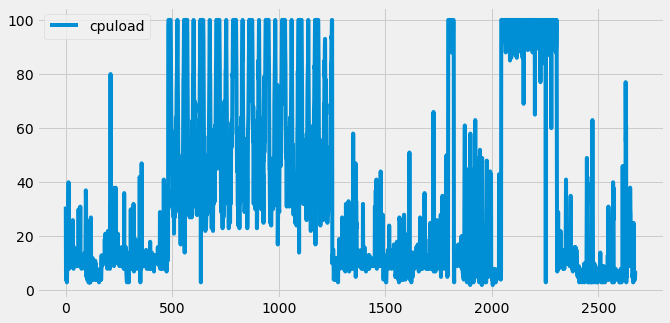

In [51]:
utilData.plot(y='cpuload')

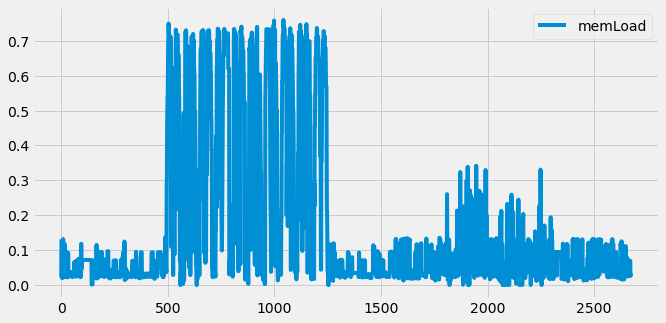

In [52]:
utilData.plot(y='memLoad')

In [53]:
x_axis= utilData.index.values.tolist()

<Figure size 3600x144 with 0 Axes>

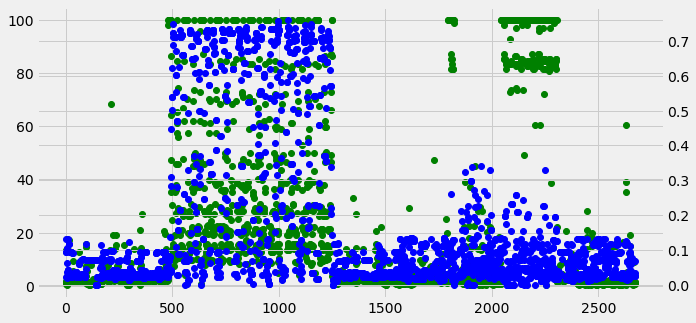

In [54]:
plt.figure(figsize=(50,2))
fig, ax1 = plt.subplots()

x = utilData.index.values.tolist()
y1 = utilData['cpuScore']
y2 = utilData['memLoad']

ax2 = ax1.twinx()

ax1.plot(x, y1, 'go')
ax2.plot(x, y2, 'bo')

In [55]:
# Empty space for plotting more

# Characterizing state and load behaviour
How does cpuload, memload, and their frequencies fare

In [56]:
def diffCorr(x,y):
    print("Pearson",stats.pearsonr(x,y))
    print("Spearman",stats.spearmanr(x,y))

In [57]:
x1 = utilData['cpuF'].to_numpy()
x2 = utilData['memfreq'].to_numpy()
diffCorr(x1,x2)

Pearson (0.3836347504363803, 1.7063228385824234e-94)
Spearman SpearmanrResult(correlation=0.47070653722998695, pvalue=1.5434514304878583e-147)


In [58]:
x1 = utilData['memLoad'].to_numpy()
x2 = utilData['cpuload'].to_numpy()
diffCorr(x1,x2)

Pearson (0.16319251172460275, 2.0338312191249533e-17)
Spearman SpearmanrResult(correlation=0.27231234018077843, pvalue=1.1147530764989117e-46)


In [59]:
x1 = utilData['cpuF'].to_numpy()
x2 = utilData['cpuScore'].to_numpy()
diffCorr(x1,x2)

Pearson (0.9767547511328467, 0.0)
Spearman SpearmanrResult(correlation=0.9563341295204049, pvalue=0.0)


In [60]:
x1 = utilData['memfreq'].to_numpy()
x2 = utilData['memLoad'].to_numpy()
diffCorr(x1,x2)

Pearson (0.6229270915789485, 2.867526676183596e-287)
Spearman SpearmanrResult(correlation=0.5987098763658174, pvalue=7.37488228744494e-260)


In [61]:
x1 = utilData['cpuF'].to_numpy()
x2 = utilData['memLoad'].to_numpy()
diffCorr(x1,x2)

Pearson (0.16660193575121196, 4.255277434031809e-18)
Spearman SpearmanrResult(correlation=0.3111704705195926, pvalue=4.017215464125179e-61)


In [62]:
x1 = utilData['memfreq'].to_numpy()
x2 = utilData['cpuScore'].to_numpy()
diffCorr(x1,x2)

Pearson (0.28102522714424977, 1.0101016102936825e-49)
Spearman SpearmanrResult(correlation=0.44547340370761845, pvalue=1.5588595621015236e-130)


### Note: Memory has more cross resource predictive power but cpu is better at its own prediction
We will utilize these values and try run a linear model to check how the coefficients look for a multi-dimensional ARMA model and a linear/other regression model

In [63]:
#Empty space for code

# Plotting PACF and ACF
We need to find out the level of autocorrelation in the values

In [64]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

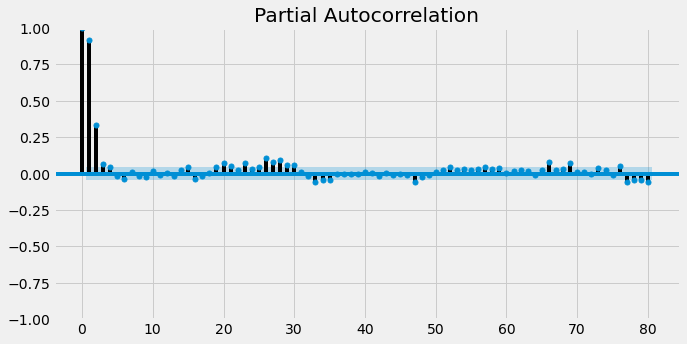

In [65]:
plot_pacf(tot_train['cpuF'], lags=80, alpha=0.05,method='ols');

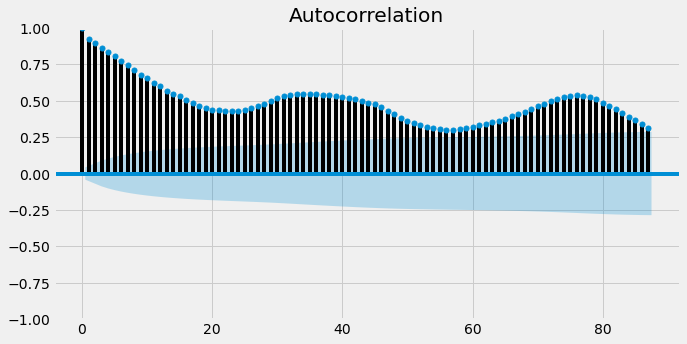

In [66]:
plot_acf(tot_train['cpuload'], lags=87, alpha=0.05);

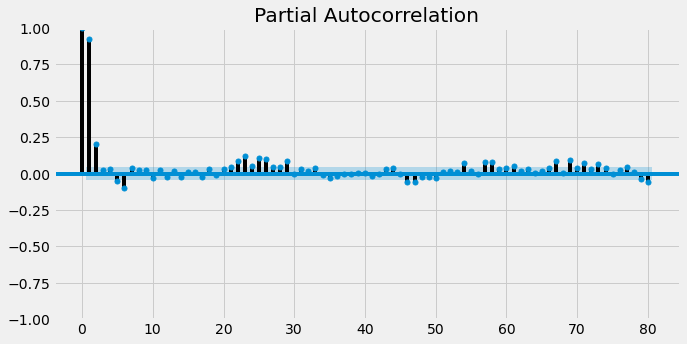

In [67]:
plot_pacf(tot_train['memScore'], lags=80, alpha=0.05,method='ols');

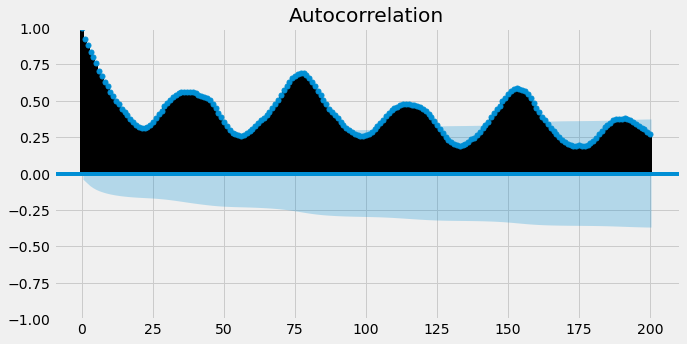

In [68]:
plot_acf(tot_train['memScore'], lags=200, alpha=0.05);